### 1. 프로젝트 당일 월드컵 조 추첨
### 2. 당일 축구 관련 네이버 뉴스 기사 제목 워드클라우드를 통한 시각화

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 6.5 MB/s 
     |████████████████████████████████| 448 kB 52.8 MB/s 


In [ ]:
import nltk 
from konlpy.tag import Kkma
from konlpy.tag import Twitter

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS 
import numpy as np
from PIL import Image
from wordcloud import ImageColorGenerator

import requests
import pandas as pd
from bs4 import BeautifulSoup

In [ ]:
news_title_url ='https://sports.news.naver.com/kfootball/news/index?isphoto=N'
headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.84 Safari/537.36'}
req_news = requests.get(news_title_url, headers = headers)
soup = BeautifulSoup(req_news.text, 'html.parser')
news_titles = soup.select('.aside_rank_news > ul > li > a')

In [ ]:
#기사 제목을 리스트에 저장하기
multi_title = []
for i in range(len(news_titles)):
    multi_title.append(news_titles[i].text)
    print(i+1, news_titles[i].text) 

1 
							ESPN "우루과이, 16강 불확실한 이유 있어"...한국에 힌트
2 
							모라이스,포르투갈에 '경고' "한국, 손흥민만 있는 게 아냐.얕봐선 안돼"
3 
							안정환·이천수, 카타르월드컵 조추첨 반응은?
4 
							"아시아 중 한국만 16강 진출...日은 3위 탈락" ESPN 전망
5 
							조별리그 모두 같은 장소, 한국 포함 세 나라만의 혜택
6 
							외신이 평가한 H조 전력 ”한국, 손흥민 필두로 한 다수의 유럽 리거”
7 
							우루과이, 벤투호에 패배 기억한다 "거의 지금 멤버로 져"
8 
							'이니에스타를 스파이로?' 日 감독, 스페인 잡으려 이니에스타에게 조언 구한다
9 
							히딩크 "불가능은 없다" vs 벤투 "기적을 바라는 것은 좋지 않아"
10 
							'아픈 기억' 떠올린 포르투갈 "2002 결승골 박지성, 몇 년 뒤 맨유로"
11 
							'시범경기 부진은 잊어라' 푸이그가 달라졌어요, 데뷔전 '대반전' [★고척]
12 
							'세계를 놀라게 할 팀', 베컴이 뽑은 이번 월드컵 최대 '다크호스' 팀은?
13 
							'1800억' 한국, WC 본선 확정국 중 가치 20위...1위는 잉글랜드
14 
							"롯데가 제일 오래됐죠? 그 다음인데…" 28년 묵은 숙원, 꾀돌이 감독의 이중성
15 
							개막전과 인연 없는 타이거즈 103억원 대투수…'비자책의 마법'에 고개 숙이다
16 
							‘팀 노히터 승리’ 김원형 감독, “퍼펙트 폰트, 투구수 104개라 교체했다” [창원 톡톡]
17 
							[SW이슈] 이것이 월클이다, 월드컵 무대서도 ‘압도적 존재감’
18 
							‘195억’ 잰슨 안 잡고, ‘195억’ 킴브렐 트레이드…LAD 선택은 왜?
19 
							수아레스에 분노하는 가나 "복수의 시간될 것"
20 
							ESPN "우루과이, 16강 불확실한 이유 있어"...한국에 힌트


In [ ]:
#문장연결하기
title = "".join(multi_title)
stop_title = title.replace('\n',' '.replace('.', ' ').replace(',',' ').replace('"',' ').replace("'"," ").replace('=',' '))
stop_title

' \t\t\t\t\t\t\tESPN "우루과이, 16강 불확실한 이유 있어"...한국에 힌트 \t\t\t\t\t\t\t모라이스,포르투갈에 \'경고\' "한국, 손흥민만 있는 게 아냐.얕봐선 안돼" \t\t\t\t\t\t\t안정환·이천수, 카타르월드컵 조추첨 반응은? \t\t\t\t\t\t\t"아시아 중 한국만 16강 진출...日은 3위 탈락" ESPN 전망 \t\t\t\t\t\t\t조별리그 모두 같은 장소, 한국 포함 세 나라만의 혜택 \t\t\t\t\t\t\t외신이 평가한 H조 전력 ”한국, 손흥민 필두로 한 다수의 유럽 리거” \t\t\t\t\t\t\t우루과이, 벤투호에 패배 기억한다 "거의 지금 멤버로 져" \t\t\t\t\t\t\t\'이니에스타를 스파이로?\' 日 감독, 스페인 잡으려 이니에스타에게 조언 구한다 \t\t\t\t\t\t\t히딩크 "불가능은 없다" vs 벤투 "기적을 바라는 것은 좋지 않아" \t\t\t\t\t\t\t\'아픈 기억\' 떠올린 포르투갈 "2002 결승골 박지성, 몇 년 뒤 맨유로" \t\t\t\t\t\t\t\'시범경기 부진은 잊어라\' 푸이그가 달라졌어요, 데뷔전 \'대반전\' [★고척] \t\t\t\t\t\t\t\'세계를 놀라게 할 팀\', 베컴이 뽑은 이번 월드컵 최대 \'다크호스\' 팀은? \t\t\t\t\t\t\t\'1800억\' 한국, WC 본선 확정국 중 가치 20위...1위는 잉글랜드 \t\t\t\t\t\t\t"롯데가 제일 오래됐죠? 그 다음인데…" 28년 묵은 숙원, 꾀돌이 감독의 이중성 \t\t\t\t\t\t\t개막전과 인연 없는 타이거즈 103억원 대투수…\'비자책의 마법\'에 고개 숙이다 \t\t\t\t\t\t\t‘팀 노히터 승리’ 김원형 감독, “퍼펙트 폰트, 투구수 104개라 교체했다” [창원 톡톡] \t\t\t\t\t\t\t[SW이슈] 이것이 월클이다, 월드컵 무대서도 ‘압도적 존재감’ \t\t\t\t\t\t\t‘195억’ 잰슨 안 잡고, ‘195억’ 킴브렐 트레이드…LAD 선택은 왜? \t\t\t\

In [ ]:
tw = Twitter()
tokens_kor = tw.nouns(stop_title)
tokens_kor
kor = nltk.Text(tokens_kor)
kor.tokens
kor.vocab()
new_kor=[]
for word in kor:
  if len(word) > 1 and word != ' ':
        new_kor.append(word)
new_kor
kor = nltk.Text(new_kor)
kor.tokens
kor.vocab()
data = kor.vocab().most_common(100)
data = dict(data)

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


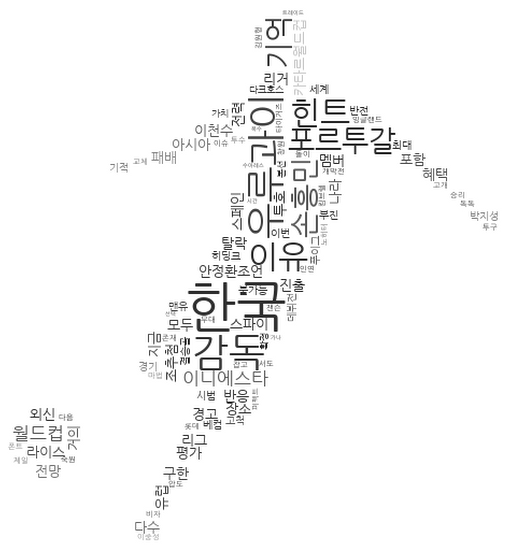

In [ ]:
img_mask = np.array(Image.open("./img/축구선수.jpg")) 
image_colors = ImageColorGenerator(img_mask)
 
FONTPATH =  "NanumGothic.ttf"   

wordcloud = WordCloud(max_font_size = 50, max_words = 1000,
                      background_color='white', stopwords=stopwords,
                      random_state=10,mask=img_mask,
                      color_func=image_colors, font_path = FONTPATH)
wc = wordcloud.generate_from_frequencies(data)

plt.figure(figsize = (10, 10))
plt.imshow(wc, interpolation = "lanczos")
plt.axis("off")
plt.show()

In [ ]:
f = open("/content/drive/MyDrive/sports_news.txt", "w")
f.write(stop_title)
f.close()